<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#tibbles" data-toc-modified-id="tibbles-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>tibbles</a></span><ul class="toc-item"><li><span><a href="#10.3-Tibbles-vs.-data.frame" data-toc-modified-id="10.3-Tibbles-vs.-data.frame-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>10.3 Tibbles vs. data.frame</a></span><ul class="toc-item"><li><span><a href="#10.3.1-Printing" data-toc-modified-id="10.3.1-Printing-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>10.3.1 Printing</a></span></li><li><span><a href="#Subsetting" data-toc-modified-id="Subsetting-1.1.2"><span class="toc-item-num">1.1.2&nbsp;&nbsp;</span>Subsetting</a></span></li></ul></li><li><span><a href="#Interacting-with-older-code" data-toc-modified-id="Interacting-with-older-code-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Interacting with older code</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Exercises</a></span></li></ul></li><li><span><a href="#Data-Import" data-toc-modified-id="Data-Import-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Import</a></span><ul class="toc-item"><li><span><a href="#Getting-started" data-toc-modified-id="Getting-started-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Getting started</a></span><ul class="toc-item"><li><span><a href="#Compared-to-base-R" data-toc-modified-id="Compared-to-base-R-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Compared to base R</a></span></li></ul></li><li><span><a href="#Parsing-a-vector" data-toc-modified-id="Parsing-a-vector-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Parsing a vector</a></span><ul class="toc-item"><li><span><a href="#Numbers" data-toc-modified-id="Numbers-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Numbers</a></span></li><li><span><a href="#Strings" data-toc-modified-id="Strings-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Strings</a></span></li><li><span><a href="#Factors" data-toc-modified-id="Factors-2.2.3"><span class="toc-item-num">2.2.3&nbsp;&nbsp;</span>Factors</a></span></li><li><span><a href="#Dates,-date-times,-and-times" data-toc-modified-id="Dates,-date-times,-and-times-2.2.4"><span class="toc-item-num">2.2.4&nbsp;&nbsp;</span>Dates, date-times, and times</a></span></li><li><span><a href="#Exercises" data-toc-modified-id="Exercises-2.2.5"><span class="toc-item-num">2.2.5&nbsp;&nbsp;</span>Exercises</a></span></li></ul></li><li><span><a href="#Parsing-a-file" data-toc-modified-id="Parsing-a-file-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Parsing a file</a></span><ul class="toc-item"><li><span><a href="#11.4.1-Strategy" data-toc-modified-id="11.4.1-Strategy-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>11.4.1 Strategy</a></span></li><li><span><a href="#11.4.2-Problems" data-toc-modified-id="11.4.2-Problems-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>11.4.2 Problems</a></span></li></ul></li></ul></li></ul></div>

# tibbles

In [1]:
library(tidyverse) 


-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.2.1     v purrr   0.3.3
v tibble  2.1.3     v dplyr   0.8.4
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



Most other R packages use regular data frames, so you might want to coerce a data frame to a tibble. You can do that with as_tibble():

In [4]:
as_tibble(iris) %>% head

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


You can create a new tibble from individual vectors with `tibble()`. `tibble()` will automatically recycle inputs of length 1, and allows you to refer to variables that you just created, as shown below.

In [5]:
tibble(
  x = 1:5, 
  y = 1, 
  z = x ^ 2 + y
)

x,y,z
<int>,<dbl>,<dbl>
1,1,2
2,1,5
3,1,10
4,1,17
5,1,26


If you’re already familiar with `data.frame()`, note that `tibble()` does much less: it never changes the type of the inputs (e.g. it never converts strings to factors!), it never changes the names of variables, and it never creates row names.

It’s possible for a tibble to have column names that are not valid R variable names, aka **non-syntactic** names. For example, they might not start with a letter, or they might contain unusual characters like a space. To refer to these variables, you need to surround them with backticks, `````:

In [7]:
tb <- tibble(
  `:)` = "smile", 
  ` ` = "space",
  `2000` = "number"
)
tb

:),,2000
<chr>,<chr>,<chr>
smile,space,number


You’ll also need the backticks when working with these variables in other packages, like ggplot2, dplyr, and tidyr.

<b><font color = 'purple'>Another way to create a tibble is with `tribble()` </font></b>, short for **tr**ansposed tibble. <font color = 'green'><b>`tribble()` is customised for data entry in code</b></font>: column headings are defined by formulas (i.e. they start with `~`), and entries are separated by commas. This makes it possible to lay out small amounts of data in easy to read form.

In [8]:
tribble(
  ~x, ~y, ~z,
  #--|--|----
  "a", 2, 3.6,
  "b", 1, 8.5
)

x,y,z
<chr>,<dbl>,<dbl>
a,2,3.6
b,1,8.5




I often add a comment (the line starting with `#`), to make it really clear where the header is.

## 10.3 Tibbles vs. data.frame

There are two main differences in the usage of a tibble vs. a classic `data.frame`: printing and subsetting.

### 10.3.1 Printing

Tibbles have a refined print method that shows only the first 10 rows, and all the columns that fit on screen. This makes it much easier to work with large data. In addition to its name, each column reports its type, a nice feature borrowed from `str()`:

In [10]:
tibble(
  a = lubridate::now() + runif(1e3) * 86400,
  b = lubridate::today() + runif(1e3) * 30,
  c = 1:1e3,
  d = runif(1e3),
  e = sample(letters, 1e3, replace = TRUE)
) %>% head(10)

a,b,c,d,e
<dttm>,<date>,<int>,<dbl>,<chr>
2020-02-05 23:59:49,2020-02-19,1,0.37208169,v
2020-02-06 00:03:07,2020-02-25,2,0.49759248,l
2020-02-05 14:57:32,2020-02-19,3,0.57364048,r
2020-02-05 20:48:11,2020-03-04,4,0.54733580,u
2020-02-06 00:34:54,2020-02-12,5,0.35295485,u
2020-02-05 15:37:50,2020-03-03,6,0.71115156,f
2020-02-05 22:56:15,2020-02-05,7,0.41592348,q
2020-02-05 18:32:34,2020-02-12,8,0.02039639,p
2020-02-05 11:27:55,2020-02-10,9,0.07608413,p


Tibbles are designed so that you don’t accidentally overwhelm your console when you print large data frames. But sometimes you need more output than the default display. There are a few options that can help.

<font color = 'blue'><b>First, you can explicitly `print()` the data frame and control the number of rows (`n`) and the `width` of the display. `width = Inf` will display all columns:</b></font>

In [11]:
nycflights13::flights %>% 
  print(n = 10, width = Inf)

# A tibble: 336,776 x 19
    year month   day dep_time sched_dep_time dep_delay arr_time sched_arr_time
   <int> <int> <int>    <int>          <int>     <dbl>    <int>          <int>
 1  2013     1     1      517            515         2      830            819
 2  2013     1     1      533            529         4      850            830
 3  2013     1     1      542            540         2      923            850
 4  2013     1     1      544            545        -1     1004           1022
 5  2013     1     1      554            600        -6      812            837
 6  2013     1     1      554            558        -4      740            728
 7  2013     1     1      555            600        -5      913            854
 8  2013     1     1      557            600        -3      709            723
 9  2013     1     1      557            600        -3      838            846
10  2013     1     1      558            600        -2      753            745
   arr_delay carrier flight

You can also control the default print behaviour by setting options:

* `options(tibble.print_max = n, tibble.print_min = m)`: if more than `n`
    rows, print only `m` rows. Use `options(tibble.print_min = Inf)` to always
    show all rows.

* Use `options(tibble.width = Inf)` to always print all columns, regardless
    of the width of the screen.

You can see a complete list of options by looking at the package help with `package?tibble`.

A final option is to use RStudio’s built-in data viewer to get a scrollable view of the complete dataset. This is also often useful at the end of a long chain of manipulations.

In [12]:
nycflights13::flights %>% 
  View()

ERROR: Error in View(.): 'View()' not yet supported in the Jupyter R kernel


### Subsetting

So far all the tools you’ve learned have worked with complete data frames. If you want to pull out a single variable, you need some new tools, `$` and `[[`. `[[` can extract by name or position; `$` only extracts by name but is a little less typing.

In [14]:
(df <- tibble(
  x = runif(5),
  y = rnorm(5)
))

x,y
<dbl>,<dbl>
0.6569941,0.28198806
0.7933843,0.06036526
0.5894810,0.60885742
0.8748079,-0.66456150
0.4881001,-0.39967770


In [15]:
# Extract by name
df$x
#> [1] 0.7330 0.2344 0.6604 0.0329 0.4605

[1] 0.6569941 0.7933843 0.5894810 0.8748079 0.4881001

In [16]:
df[["x"]]
#> [1] 0.7330 0.2344 0.6604 0.0329 0.4605

[1] 0.6569941 0.7933843 0.5894810 0.8748079 0.4881001

In [17]:
# Extract by position
df[[1]]
#> [1] 0.7330 0.2344 0.6604 0.0329 0.4605

[1] 0.6569941 0.7933843 0.5894810 0.8748079 0.4881001

<font color = 'green'><b>To use these in a pipe, you’ll need to use the special placeholder .:</b></font>

In [20]:
df %>% .$x
#> [1] 0.7330 0.2344 0.6604 0.0329 0.4605

[1] 0.6569941 0.7933843 0.5894810 0.8748079 0.4881001

In [19]:
df %>% .[["x"]]
#> [1] 0.7330 0.2344 0.6604 0.0329 0.4605

[1] 0.6569941 0.7933843 0.5894810 0.8748079 0.4881001

Compared to a data.frame, tibbles are more strict: they never do partial matching, and they will generate a warning if the column you are trying to access does not exist.

## Interacting with older code

Some older functions don’t work with tibbles. If you encounter one of these functions, use `as.data.frame()` to turn a tibble back to a `data.frame`:

In [21]:
class(as.data.frame(tb))
#> [1] "data.frame"

[1] "data.frame"

The main reason that some older functions don’t work with tibble is the `[` function. 

We don’t use `[` much in this book because `dplyr::filter()` and `dplyr::select()` allow you to solve the same problems with clearer code (but you will learn a little about it in [vector subsetting](https://r4ds.had.co.nz/vectors.html#vector-subsetting)). 

With base R data frames, `[` sometimes returns a data frame, and sometimes returns a vector. With tibbles, `[` always returns another tibble.

## Exercises

1.  How can you tell if an object is a tibble? (Hint: try printing `mtcars`,
    which is a regular data frame).

But when we first convert `mtcars` to a tibble using `as_tibble()`, it prints on the
first ten observations. There are also some other differences in formatting
of the printed data frame.

In [23]:
as_tibble(mtcars) %>% head

mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
18.7,8,360,175,3.15,3.440,17.02,0,0,3,2
18.1,6,225,105,2.76,3.460,20.22,1,0,3,1


You can use the function `is_tibble()` to check whether a data frame is a tibble or not.
The `mtcars` data frame is not a tibble.

In [25]:
is_tibble(mtcars)
is_tibble(as_tibble(mtcars))


# But the diamonds and flights data are tibbles.
is_tibble(ggplot2::diamonds)
#> [1] TRUE
is_tibble(nycflights13::flights)
#> [1] TRUE
is_tibble(as_tibble(mtcars))
#> [1] TRUE

[1] FALSE

[1] TRUE

More generally, you can use the `class()` function to find out the class of an
object. Tibbles has the classes `c("tbl_df", "tbl", "data.frame")`, while old
data frames will only have the class `"data.frame"`.

In [26]:
class(mtcars)
#> [1] "data.frame"
class(ggplot2::diamonds)
#> [1] "tbl_df"     "tbl"        "data.frame"
class(nycflights13::flights)
#> [1] "tbl_df"     "tbl"        "data.frame"

[1] "data.frame"

[1] "tbl_df"     "tbl"        "data.frame"

[1] "tbl_df"     "tbl"        "data.frame"

2.  Compare and contrast the following operations on a `data.frame` and
    equivalent tibble. What is different? Why might the default data frame
    behaviours cause you frustration?

In [29]:
(df <- data.frame(abc = 1, xyz = "a"))

abc,xyz
<dbl>,<fct>
1,a


In [36]:
df$x
#> [1] a
#> Levels: a
df[, "xyz"]
#> [1] a
#> Levels: a
df[, c("abc", "xyz")]
#>   abc xyz
#> 1   1   a

[1] a
Levels: a

[1] a
Levels: a

abc,xyz
<dbl>,<fct>
1,a


In [34]:
tbl <- as_tibble(df)
tbl$x
#> Warning: Unknown or uninitialised column: 'x'.
#> NULL
tbl[, "xyz"]
#> # A tibble: 1 x 1
#>   xyz  
#>   <fct>
#> 1 a
tbl[, c("abc", "xyz")]
#> # A tibble: 1 x 2
#>     abc xyz  
#>   <dbl> <fct>
#> 1     1 a

Warning message:
"Unknown or uninitialised column: 'x'."


NULL

xyz
<fct>
a


abc,xyz
<dbl>,<fct>
1,a


The `$` operator will match any column name that starts with the name following it.
Since there is a column named `xyz`, the expression `df$x` will be expanded to `df$xyz`.
This behavior of the `$` operator saves a few keystrokes, but it can result in accidentally 
<hypothesis-highlight class="annotator-hl">using a</hypothesis-highlight> different column than you thought you were using.

With data.frames, with `[` the type of object that is returned differs on the
number of columns. If it is one column, it won’t return a data.frame, but
instead will return a vector. With more than one column, then it will return a
data.frame. This is fine if you know what you are passing in, but suppose you
did `df[ , vars]` where `vars` was a variable. Then what that code does
depends on `length(vars)` and you’d have to write code to account for those
situations or risk bugs.

3.  If you have the name of a variable stored in an object, e.g. `var <- "mpg"`,
    how can you extract the reference variable from a tibble?

You can use the double bracket, like `df[[var]]`. You cannot use the dollar sign, because `df$var` would look for a column named `var`.

4.  Practice referring to non-syntactic names in the following data frame by:
    1.  Extracting the variable called `1`.

    2.  Plotting a scatterplot of `1` vs `2`.

    3.  Creating a new column called `3` which is `2` divided by `1`.

    4.  Renaming the columns to `one`, `two` and `three`.


```sourceCode

In [38]:
(annoying <- tibble(
  `1` = 1:10,
  `2` = `1` * 2 + rnorm(length(`1`))
))

1,2
<int>,<dbl>
1,3.378387
2,7.157514
3,4.394185
4,7.251243
5,12.068401
6,12.020555
7,14.901617
8,14.849963
9,18.518154


In [44]:
annoying$`1`

annoying[["1"]]

[1]  1  2  3  4  5  6  7  8  9 10

[1]  1  2  3  4  5  6  7  8  9 10

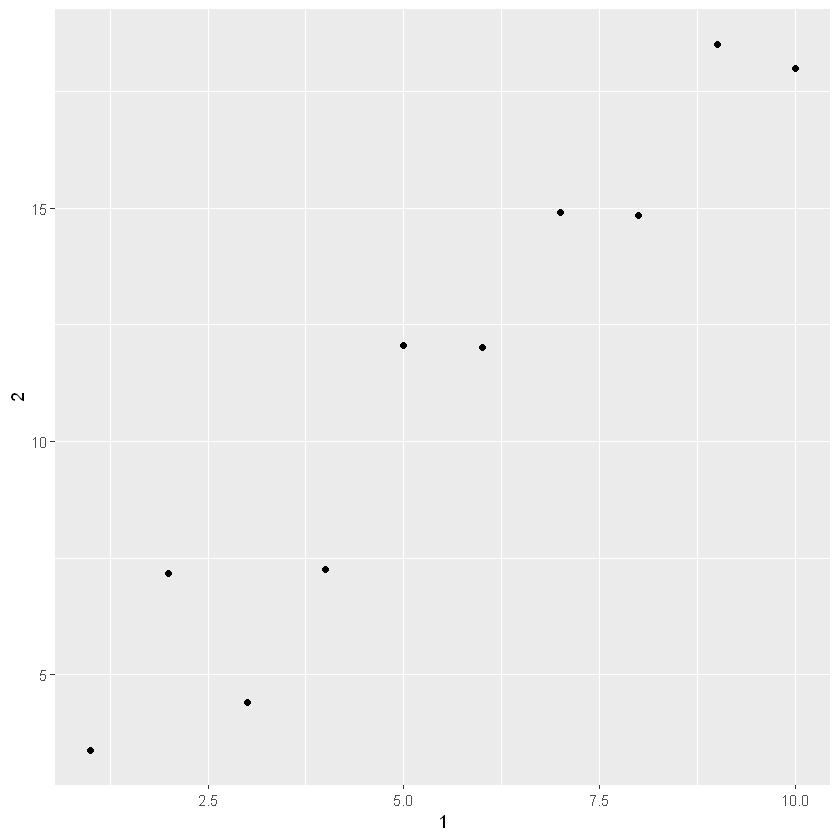

In [45]:
ggplot(data = annoying, mapping = aes(x = `1`, y = `2`)) +
    geom_point()

In [51]:
annoying <- annoying %>% mutate(`3` = `2` / `1`) 

In [50]:
annoying %>% mutate(`3` = `2` / `1`) %>% select(one = `1`,two = `2`,three = `3`)

one,two,three
<int>,<dbl>,<dbl>
1,3.378387,3.378387
2,7.157514,3.578757
3,4.394185,1.464728
4,7.251243,1.812811
5,12.068401,2.413680
6,12.020555,2.003426
7,14.901617,2.128802
8,14.849963,1.856245
9,18.518154,2.057573


In [52]:
(annoying <- rename(annoying, one = `1`, two = `2`, three = `3`))

one,two,three
<int>,<dbl>,<dbl>
1,3.378387,3.378387
2,7.157514,3.578757
3,4.394185,1.464728
4,7.251243,1.812811
5,12.068401,2.413680
6,12.020555,2.003426
7,14.901617,2.128802
8,14.849963,1.856245
9,18.518154,2.057573


5.  What does `tibble::enframe()` do? When might you use it?

The function `tibble::enframe()` converts named vectors to a data frame with names and values

In [39]:
enframe(c(a = 1, b = 2, c = 3))

name,value
<chr>,<dbl>
a,1
b,2
c,3


6.  What option controls how many additional column names are printed
    at the footer of a tibble?

The help page for the print() method of tibble objects is discussed in ?print.tbl. The n_extra argument determines the number of extra columns to print information for.

# Data Import

In [53]:
library(tidyverse) 

## Getting started

Most of readr’s functions are concerned with turning flat files into data frames:

* `read_csv()` reads comma delimited files, `read_csv2()` reads semicolon
    separated files (common in countries where `,` is used as the decimal place),
    `read_tsv()` reads tab delimited files, and `read_delim()` reads in files
    with any delimiter.

* `read_fwf()` reads fixed width files. You can specify fields either by their
    widths with `fwf_widths()` or their position with `fwf_positions()`.
    `read_table()` reads a common variation of fixed width files where columns
    are separated by white space.

* `read_log()` reads Apache style log files. (But also check out
    [webreadr](https://github.com/Ironholds/webreadr) which is built on top
    of `read_log()` and provides many more helpful tools.)

These functions all have similar syntax: once you’ve mastered one, you can use the others with ease. For the rest of this chapter we’ll focus on `read_csv()`. Not only are csv files one of the most common forms of data storage, but once you understand `read_csv()`, you can easily apply your knowledge to all the other functions in readr.

The first argument to `read_csv()` is the most important: it’s the path to the file to read

In [54]:
heights <- read_csv("data/heights.csv")

ERROR: Error: 'data/heights.csv' does not exist in current working directory ('C:/Users/bings/DS/0_McElreath_SR').


When you run `read_csv()` it prints out a column specification that gives the name and type of each column. That’s an important part of readr, which we’ll come back to in [parsing a file](https://r4ds.had.co.nz/data-import.html#parsing-a-file).

You can also supply an inline csv file. This is useful for experimenting with readr and for creating reproducible examples to share with others:

In [59]:
read_csv("a,b,c
          1,2,3
          4,5,6")


a,b,c
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


In both cases `read_csv()` uses the first line of the data for the column names, which is a very common convention. There are two cases where you might want to tweak this behaviour:

1.  Sometimes there are a few lines of metadata at the top of the file. You can
    use `skip = n` to skip the first `n` lines; or use `comment = "#"` to drop
    all lines that start with (e.g.) `#`.

In [63]:
read_csv("The first line of metadata
  The second line of metadata
  x,y,z
  1,2,3", skip = 2)

x,y,z
<dbl>,<dbl>,<dbl>
1,2,3


In [65]:
read_csv("# A comment I want to skip
  x,y,z
  1,2,3", comment = "#")

x,y,z
<dbl>,<dbl>,<dbl>
1,2,3


The data might not have column names. You can use `col_names = FALSE` to
tell `read_csv()` not to treat the first row as headings, and instead
label them sequentially from `X1` to `Xn`:



In [66]:
read_csv("1,2,3\n4,5,6", col_names = FALSE)

X1,X2,X3
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


(`"\n"` is a convenient shortcut for adding a new line. You’ll learn more
about it and other types of string escape in [string basics](https://r4ds.had.co.nz/strings.html#string-basics).)

Alternatively you can pass `col_names` a character vector which will be
used as the column names:

In [67]:
read_csv("1,2,3\n4,5,6", col_names = c("x", "y", "z"))

x,y,z
<dbl>,<dbl>,<dbl>
1,2,3
4,5,6


nother option that commonly needs tweaking is `na`: this specifies the value (or values) that are used to represent missing values in your file:

In [68]:
read_csv("a,b,c\n1,2,.", na = ".")

a,b,c
<dbl>,<dbl>,<lgl>
1,2,NA


This is all you need to know to read ~75% of CSV files that you’ll encounter in practice. You can also easily adapt what you’ve learned to read tab separated files with `read_tsv()` and fixed width files with `read_fwf()`. To read in more challenging files, you’ll need to learn more about how readr parses each column, turning them into R vectors.

### Compared to base R

If you’ve used R before, you might wonder why we’re not using `read.csv()`. There are a few good reasons to favour readr functions over the base equivalents:

* They are typically much faster (~10x) than their base equivalents.
    Long running jobs have a progress bar, so you can see what’s happening.
    If you’re looking for raw speed, try `data.table::fread()`. It doesn’t fit
    quite so well into the tidyverse, but it can be quite a bit faster.

* They produce tibbles, they don’t convert character vectors to factors,
    use row names, or munge the column names. These are common sources of
    frustration with the base R functions.

* They are more reproducible. Base R functions inherit some behaviour from
    your operating system and environment variables, so import code that works
    on your computer might not work on someone else’s.

## Parsing a vector

Before we get into the details of how readr reads files from disk, we need to take a little detour to talk about the `parse_*()` functions. <font color = 'green'><b>These functions take a <span style='background-color: lightyellow'>character vector</span> and <span style='background-color: lightyellow'>return a more specialised vector</span> like a logical, integer, or date:</b></font>

In [69]:
str(parse_logical(c("TRUE", "FALSE", "NA")))
#>  logi [1:3] TRUE FALSE NA
str(parse_integer(c("1", "2", "3")))
#>  int [1:3] 1 2 3
str(parse_date(c("2010-01-01", "1979-10-14")))
#>  Date[1:2], format: "2010-01-01" "1979-10-14"

 logi [1:3] TRUE FALSE NA
 int [1:3] 1 2 3
 Date[1:2], format: "2010-01-01" "1979-10-14"


These functions are useful in their own right, but are also an important building block for readr. Once you’ve learned how the individual parsers work in this section, we’ll circle back and see how they fit together to parse a complete file in the next section.

Like all functions in the tidyverse, the `parse_*()` functions are uniform: the first argument is a character vector to parse, and the `na` argument specifies which strings should be treated as missing:

In [70]:
parse_integer(c("1", "231", ".", "456"), na = ".")
#> [1]   1 231  NA 456

[1]   1 231  NA 456

In [71]:
# If parsing fails, you’ll get a warning:
x <- parse_integer(c("123", "345", "abc", "123.45"))

Warning message:
"2 parsing failures.
row col               expected actual
  3  -- an integer                abc
  4  -- no trailing characters    .45
"


And the failures will be missing in the output:

Using parsers is mostly a matter of understanding what’s available and how they deal with different types of input. There are eight particularly important parsers:

1.  `parse_logical()` and `parse_integer()` parse logicals and integers
    respectively. There’s basically nothing that can go wrong with these
    parsers so I won’t describe them here further.

2.  `parse_double()` is a strict numeric parser, and `parse_number()`
    is a flexible numeric parser. These are more complicated than you might
    expect because different parts of the world write numbers in different
    ways.

3.  `parse_character()` seems so simple that it shouldn’t be necessary. But
    one complication makes it quite important: character encodings.

4.  `parse_factor()` create factors, the data structure that R uses to represent
    categorical variables with fixed and known values.

5.  `parse_datetime()`, `parse_date()`, and `parse_time()` allow you to
    parse various date & time specifications. These are the most complicated
    because there are so many different ways of writing dates.

The following sections describe these parsers in more detail.

### Numbers

It seems like it should be straightforward to parse a number, but three problems make it tricky:

1.  People write numbers differently in different parts of the world.
    For example, some countries use `.` in between the integer and fractional
    parts of a real number, while others use `,`.

2.  Numbers are often surrounded by other characters that provide some
    context, like “$1000” or “10%”.

3.  Numbers often contain “grouping” characters to make them easier to read,
    like “1,000,000”, and these grouping characters vary around the world.

To address the first problem, readr has the notion of a “locale”, an object that specifies parsing options that differ from place to place. When parsing numbers, the most important option is the character you use for the decimal mark. You can override the default value of `.` by creating a new locale and setting the `decimal_mark` argument:

In [72]:
parse_double("1.23")
#> [1] 1.23
parse_double("1,23", locale = locale(decimal_mark = ","))
#> [1] 1.23

[1] 1.23

[1] 1.23

readr’s default locale is US-centric, because generally R is US-centric (i.e. the documentation of base R is written in American English). An alternative approach would be to try and guess the defaults from your operating system. This is hard to do well, and, more importantly, makes your code fragile: even if it works on your computer, it might fail when you email it to a colleague in another country.

`parse_number()` addresses the second problem: it ignores non-numeric characters before and after the number. This is particularly useful for currencies and percentages, but also works to extract numbers embedded in text.

In [76]:
parse_number("$100")
#> [1] 100
parse_number("20%")
#> [1] 20
parse_number("It cost $123.45")
#> [1] 123

[1] 100

[1] 20

[1] 123.45

The final problem is addressed by the combination of `parse_number()` and the locale as `parse_number()` will ignore the “grouping mark”:


In [77]:
# Used in America
parse_number("$123,456,789")
#> [1] 1.23e+08

# Used in many parts of Europe
parse_number("123.456.789", locale = locale(grouping_mark = "."))
#> [1] 1.23e+08

# Used in Switzerland
parse_number("123'456'789", locale = locale(grouping_mark = "'"))
#> [1] 1.23e+08

[1] 123456789

[1] 123456789

[1] 123456789

### Strings

It seems like `parse_character()` should be really simple — it could just return its input. Unfortunately life isn’t so simple, as there are multiple ways to represent the same string. To understand what’s going on, we need to dive into the details of how computers represent strings. In R, we can get at the underlying representation of a string using `charToRaw()`:

In [78]:
charToRaw("Hadley")
#> [1] 48 61 64 6c 65 79

[1] 48 61 64 6c 65 79

<font color = 'blue'>Each hexadecimal number represents a byte of information: `48` is H, `61` is a, and so on. The mapping from hexadecimal number to character is called the encoding, and in this case the encoding is called ASCII</font>. ASCII does a great job of representing English characters, because it’s the **American** Standard Code for Information Interchange.

Things get more complicated for languages other than English. In the early days of computing there were many competing standards for encoding non-English characters, and to correctly interpret a string you needed to know both the values and the encoding. For example, two common encodings are Latin1 (aka ISO-8859-1, used for Western European languages) and Latin2 (aka ISO-8859-2, used for Eastern European languages). In Latin1, the byte `b1` is “±”, but in Latin2, it’s “ą”! Fortunately, today there is one standard that is supported almost everywhere: UTF-8. UTF-8 can encode just about every character used by humans today, as well as many extra symbols (like emoji!).

<font color = 'blue'>readr uses UTF-8 everywhere: it assumes your data is UTF-8 encoded</font> when you read it, and always uses it when writing. This is a good default, but will fail for data produced by older systems that don’t understand UTF-8. If this happens to you, your strings will look weird when you print them. Sometimes just one or two characters might be messed up; other times you’ll get complete gibberish. For example:

In [79]:
x1 <- "El Ni\xf1o was particularly bad this year"
x2 <- "\x82\xb1\x82\xf1\x82\xc9\x82\xbf\x82\xcd"

x1
#> [1] "El Ni\xf1o was particularly bad this year"
x2
#> [1] "\x82\xb1\x82\xf1\x82ɂ\xbf\x82\xcd"

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "El Niño was particularly bad this year"

[1] "‚±‚ñ‚É‚¿‚Í"

To fix the problem you need to specify the encoding in parse_character():

In [80]:
parse_character(x1, locale = locale(encoding = "Latin1"))
#> [1] "El Niño was particularly bad this year"
parse_character(x2, locale = locale(encoding = "Shift-JIS"))
#> [1] "こんにちは"

Your code contains a unicode char which cannot be displayed in your
current locale and R will silently convert it to an escaped form when the
R kernel executes this code. This can lead to subtle errors if you use
such chars to do comparisons. For more information, please see
https://github.com/IRkernel/repr/wiki/Problems-with-unicode-on-windows

[1] "El Niño was particularly bad this year"

[1] "<U+3053><U+3093><U+306B><U+3061><U+306F>"

How do you find the correct encoding? If you’re lucky, it’ll be included somewhere in the data documentation. Unfortunately, that’s rarely the case, so readr provides `guess_encoding()` to help you figure it out. It’s not foolproof, and it works better when you have lots of text (unlike here), but it’s a reasonable place to start. Expect to try a few different encodings before you find the right one.


In [81]:
guess_encoding(charToRaw(x1))
#> # A tibble: 2 x 2
#>   encoding   confidence
#>   <chr>           <dbl>
#> 1 ISO-8859-1       0.46
#> 2 ISO-8859-9       0.23
guess_encoding(charToRaw(x2))
#> # A tibble: 1 x 2
#>   encoding confidence
#>   <chr>         <dbl>
#> 1 KOI8-R         0.42

encoding,confidence
<chr>,<dbl>
ISO-8859-1,0.46
ISO-8859-9,0.23


encoding,confidence
<chr>,<dbl>
KOI8-R,0.42


The first argument to `guess_encoding()` can either be a path to a file, or, as in this case, a raw vector (useful if the strings are already in R).

Encodings are a rich and complex topic, and I’ve only scratched the surface here. If you’d like to learn more I’d recommend reading the detailed explanation at http://kunststube.net/encoding/.

### Factors

R uses factors to represent categorical variables that have a known set of possible values. Give `parse_factor()` a vector of known `levels` to generate a warning whenever an unexpected value is present:


In [83]:
fruit <- c("apple", "banana")
parse_factor(c("apple", "banana", "bananana"), levels = fruit)
#> Warning: 1 parsing failure.
#> row col           expected   actual
#>   3  -- value in level set bananana
#> [1] apple  banana <NA>  
#> attr(,"problems")
#> # A tibble: 1 x 4
#>     row   col expected           actual  
#>   <int> <int> <chr>              <chr>   
#> 1     3    NA value in level set bananana
#> Levels: apple banana

Warning message:
"1 parsing failure.
row col           expected   actual
  3  -- value in level set bananana
"


[1] apple  banana <NA>  
attr(,"problems")
# A tibble: 1 x 4
    row   col expected           actual  
  <int> <int> <chr>              <chr>   
1     3    NA value in level set bananana
Levels: apple banana

But if you have many problematic entries, it’s often easier to leave as character vectors and then use the tools you’ll learn about in [strings](https://r4ds.had.co.nz/strings.html#strings) and [factors](https://r4ds.had.co.nz/vectors.html#factors-1) to clean them up.

### Dates, date-times, and times

You pick between three parsers depending on whether you want a date (the number of days since 1970-01-01), a date-time (the number of seconds since midnight 1970-01-01), or a time (the number of seconds since midnight). When called without any additional arguments:

* `parse_datetime()` expects an ISO8601 date-time. ISO8601 is an
    international standard in which the components of a date are
    organised from biggest to smallest: year, month, day, hour, minute,
    second.


In [84]:
parse_datetime("2010-10-01T2010")
#> [1] "2010-10-01 20:10:00 UTC"
# If time is omitted, it will be set to midnight
parse_datetime("20101010")
#> [1] "2010-10-10 UTC"


[1] "2010-10-01 20:10:00 UTC"

[1] "2010-10-10 UTC"

This is the most important date/time standard, and if you work with
    dates and times frequently, I recommend reading
    https://en.wikipedia.org/wiki/ISO_8601

2.  `parse_date()` expects a four digit year, a `-` or `/`, the month, a `-`
    or `/`, then the day:

In [85]:
parse_date("2010-10-01")
#> [1] "2010-10-01"

[1] "2010-10-01"

`parse_time()` expects the hour, `:`, minutes, optionally `:` and seconds,
and an optional am/pm specifier:

In [87]:
library(hms)
parse_time("01:10 am")
#> 01:10:00
parse_time("20:10:01")
#> 20:10:01

01:10:00

20:10:01

* Base R doesn’t have a great built in class for time data, so we use
    the one provided in the hms package.

If these defaults don’t work for your data you can supply your own date-time `format`, built up of the following pieces:

<img src='pics/Snap37.png' alt='Drawing' style='width:525pt'/>

The best way to figure out the correct format is to create a few examples in a character vector, and test with one of the parsing functions. For example:

In [88]:
parse_date("01/02/15", "%m/%d/%y")
#> [1] "2015-01-02"
parse_date("01/02/15", "%d/%m/%y")
#> [1] "2015-02-01"
parse_date("01/02/15", "%y/%m/%d")
#> [1] "2001-02-15"

[1] "2015-01-02"

[1] "2015-02-01"

[1] "2001-02-15"

### Exercises

##### 1.  What are the most important arguments to `locale()`?

The locale object has arguments to set the following:

* date and time formats: `date_names`, `date_format`, and `time_format`
* time zone: `tz`
* numbers: `decimal_mark`, `grouping_mark`
* encoding: `encoding`

##### 2. What happens if you try and set `decimal_mark` and `grouping_mark`   to the same character? 

What happens to the default value of   `grouping_mark` when you set `decimal_mark` to “,”? 

What happens   to the default value of `decimal_mark` when you set the `grouping_mark`   to “.”?

If the decimal and grouping marks are set to the same character, `locale` throws an error:

<button type="button" class="copy-to-clipboard-button" title="Copy to clipboard" aria-label="Copy to clipboard"><i class="fa fa-copy"></i></button>

```sourceCode
locale(decimal_mark = ".", grouping_mark = ".")
#> Error: `decimal_mark` and `grouping_mark` must be different
```

If the `decimal_mark` is set to the comma "`,"`, then the grouping mark is set to the period `"."`:

<button type="button" class="copy-to-clipboard-button" title="Copy to clipboard" aria-label="Copy to clipboard"><i class="fa fa-copy"></i></button>

```sourceCode
locale(decimal_mark = ",")
#> <locale>
#> Numbers:  123.456,78
#> Formats:  %AD / %AT
#> Timezone: UTC
#> Encoding: UTF-8
#> <date_names>
#> Days:   Sunday (Sun), Monday (Mon), Tuesday (Tue), Wednesday (Wed),
#>         Thursday (Thu), Friday (Fri), Saturday (Sat)
#> Months: January (Jan), February (Feb), March (Mar), April (Apr), May
#>         (May), June (Jun), July (Jul), August (Aug), September
#>         (Sep), October (Oct), November (Nov), December (Dec)
#> AM/PM:  AM/PM
```

If the grouping mark is set to a period, then the decimal mark is set to a comma

<button type="button" class="copy-to-clipboard-button" title="Copy to clipboard" aria-label="Copy to clipboard"><i class="fa fa-copy"></i></button>

```sourceCode
locale(grouping_mark = ",")
#> <locale>
#> Numbers:  123,456.78
#> Formats:  %AD / %AT
#> Timezone: UTC
#> Encoding: UTF-8
#> <date_names>
#> Days:   Sunday (Sun), Monday (Mon), Tuesday (Tue), Wednesday (Wed),
#>         Thursday (Thu), Friday (Fri), Saturday (Sat)
#> Months: January (Jan), February (Feb), March (Mar), April (Apr), May
#>         (May), June (Jun), July (Jul), August (Aug), September
#>         (Sep), October (Oct), November (Nov), December (Dec)
#> AM/PM:  AM/PM
```

##### 3. I didn’t discuss the `date_format` and `time_format` options to   `locale()`. What do they do? Construct an example that shows when   they might be useful.

They provide default date and time formats.
The [readr vignette](https://cran.r-project.org/web/packages/readr/vignettes/locales.html) discusses using these to parse dates: since dates can include languages specific weekday and month names, and different conventions for specifying AM/PM

<button type="button" class="copy-to-clipboard-button" title="Copy to clipboard" aria-label="Copy to clipboard"><i class="fa fa-copy"></i></button>

```sourceCode
locale()
#> <locale>
#> Numbers:  123,456.78
#> Formats:  %AD / %AT
#> Timezone: UTC
#> Encoding: UTF-8
#> <date_names>
#> Days:   Sunday (Sun), Monday (Mon), Tuesday (Tue), Wednesday (Wed),
#>         Thursday (Thu), Friday (Fri), Saturday (Sat)
#> Months: January (Jan), February (Feb), March (Mar), April (Apr), May
#>         (May), June (Jun), July (Jul), August (Aug), September
#>         (Sep), October (Oct), November (Nov), December (Dec)
#> AM/PM:  AM/PM
```

Examples from the readr vignette of parsing French dates

<button type="button" class="copy-to-clipboard-button" title="Copy to clipboard" aria-label="Copy to clipboard"><i class="fa fa-copy"></i></button>

```sourceCode
parse_date("1 janvier 2015", "%d %B %Y", locale = locale("fr"))
#> [1] "2015-01-01"
parse_date("14 oct. 1979", "%d %b %Y", locale = locale("fr"))
#> [1] "1979-10-14"
```

Apparently the time format is not used for anything, but the date format is used for guessing column types.

##### 4. If you live outside the US, create a new locale object that encapsulates   the settings for the types of file you read most commonly.

Read the help page for `locale()` using `?locale` to learn about the different variables that can be set.

As an example, consider Australia.
Most of the defaults values are valid, except that the date format is “(d)d/mm/yyyy”, meaning that January 2, 2006 is written as `02/01/2006`.

However, default locale will parse that date as February 1, 2006.



```sourceCode
parse_date("02/01/2006")
#> Warning: 1 parsing failure.
#> row col   expected     actual
#>   1  -- date like  02/01/2006
#> [1] NA
```

To correctly parse Australian dates, define a new `locale` object.

```sourceCode
au_locale <- locale(date_format = "%d/%m/%Y")
```

Using `parse_date()` with the `au_locale` as its locale will correctly parse our example date.


```sourceCode
parse_date("02/01/2006", locale = au_locale)
#> [1] "2006-01-02"
```

##### 5.  What’s the difference between `read_csv()` and `read_csv2()`?

The delimiter. The function `read_csv()` uses a comma, while `read_csv2()` uses a semi-colon (`;`). Using a semi-colon is useful when commas are used as the decimal point (as in Europe).

##### 6.  What are the most common encodings used in Europe? 

What are the   most common encodings used in Asia? Do some googling to find out.

UTF-8 is standard now, and ASCII has been around forever.

For the European languages, there are separate encodings for Romance languages and Eastern European languages using Latin script, Cyrillic, Greek, Hebrew, Turkish: usually with separate ISO and Windows encoding standards.
There is also Mac OS Roman.

For Asian languages Arabic and Vietnamese have ISO and Windows standards. The other major Asian scripts have their own:

* Japanese: JIS X 0208, Shift JIS, ISO-2022-JP
* Chinese: GB 2312, GBK, GB 18030
* Korean: KS X 1001, EUC-KR, ISO-2022-KR

The list in the documentation for `stringi::stri_enc_detect()` is a good list of encodings since it supports the most common encodings.

* Western European Latin script languages: ISO-8859-1, Windows-1250 (also CP-1250 for code-point)
* Eastern European Latin script languages: ISO-8859-2, Windows-1252
* Greek: ISO-8859-7
* Turkish: ISO-8859-9, Windows-1254
* Hebrew: ISO-8859-8, IBM424, Windows 1255
* Russian: Windows 1251
* Japanese: Shift JIS, ISO-2022-JP, EUC-JP
* Korean: ISO-2022-KR, EUC-KR
* Chinese: GB18030, ISO-2022-CN (Simplified), Big5 (Traditional)
* Arabic: ISO-8859-6, IBM420, Windows 1256

For more information on character encodings see the following sources.

* The Wikipedia page [Character encoding](https://en.wikipedia.org/wiki/Character_encoding), has a good list of encodings.
* Unicode [CLDR](http://cldr.unicode.org/) project
* [What is the most common encoding of each language](https://stackoverflow.com/questions/8509339/what-is-the-most-common-encoding-of-each-language) (Stack Overflow)
* “What Every Programmer Absolutely, Positively Needs To Know About Encodings And Character Sets To Work With Text”, http://kunststube.net/encoding/.

Programs that identify the encoding of text include:

* `readr::guess_encoding()`
* `stringi::str_enc_detect()`
* [iconv](https://en.wikipedia.org/wiki/Iconv)
* [chardet](https://github.com/chardet/chardet) (Python)

##### 7.  Generate the correct format string to parse each of the following  dates and times:

In [ ]:
  
d1 <- "January 1, 2010"
d2 <- "2015-Mar-07"
d3 <- "06-Jun-2017"
d4 <- c("August 19 (2015)", "July 1 (2015)")
d5 <- "12/30/14" # Dec 30, 2014
t1 <- "1705"
t2 <- "11:15:10.12 PM"

In [ ]:
parse_date(d1, "%B %d, %Y")
#> [1] "2010-01-01"
parse_date(d2, "%Y-%b-%d")
#> [1] "2015-03-07"
parse_date(d3, "%d-%b-%Y")
#> [1] "2017-06-06"
parse_date(d4, "%B %d (%Y)")
#> [1] "2015-08-19" "2015-07-01"
parse_date(d5, "%m/%d/%y")
#> [1] "2014-12-30"
parse_time(t1, "%H%M")
#> 17:05:00

## Parsing a file

Now that you’ve learned how to parse an individual vector, it’s time to return to the beginning and explore how readr parses a file. There are two new things that you’ll learn about in this section:

1.  How readr automatically guesses the type of each column.
2.  How to override the default specification.

### 11.4.1 Strategy

readr uses a heuristic to figure out the type of each column: it reads the first 1000 rows and uses some (moderately conservative) heuristics to figure out the type of each column. You can emulate this process with a character vector using `guess_parser()`, which returns readr’s best guess, and `parse_guess()` which uses that guess to parse the column:


```sourceCode
guess_parser("2010-10-01")
#> [1] "date"
guess_parser("15:01")
#> [1] "time"
guess_parser(c("TRUE", "FALSE"))
#> [1] "logical"
guess_parser(c("1", "5", "9"))
#> [1] "double"
guess_parser(c("12,352,561"))
#> [1] "number"

str(parse_guess("2010-10-10"))
#>  Date[1:1], format: "2010-10-10"
```

The heuristic tries each of the following types, stopping when it finds a match:

* logical: contains only “F”, “T”, “FALSE”, or “TRUE”.
* integer: contains only numeric characters (and `-`).
* double: contains only valid doubles (including numbers like `4.5e-5`).
* number: contains valid doubles with the grouping mark inside.
* time: matches the default `time_format`.
* date: matches the default `date_format`.
* date-time: any ISO8601 date.

If none of these rules apply, then the column will stay as a vector of strings.

### 11.4.2 Problems

These defaults don’t always work for larger files. There are two basic problems:

1.  The first thousand rows might be a special case, and readr guesses
    a type that is not sufficiently general. For example, you might have
    a column of doubles that only contains integers in the first 1000 rows.

2.  The column might contain a lot of missing values. If the first 1000
    rows contain only `NA`s, readr will guess that it’s a logical
    vector, whereas you probably want to parse it as something more
    specific.

readr contains a challenging CSV that illustrates both of these problems: